# Тестирование выделения главных компонент в изображении использовав преобразование Фурье и SVD разложение

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from copy import copy

from ipywidgets import interact
import ipywidgets as widgets

In [4]:
sliderFur = widgets.IntSlider(
    value=1,
    min=0,
    max=1,
    step=1,
    description='Change:',
    continuous_update=True,
    layout=widgets.Layout(width='90%')
)

sliderSVD = widgets.IntSlider(
    value=1,
    min=0,
    max=1,
    step=1,
    description='Change:',
    continuous_update=True,
    layout=widgets.Layout(width='90%')
)

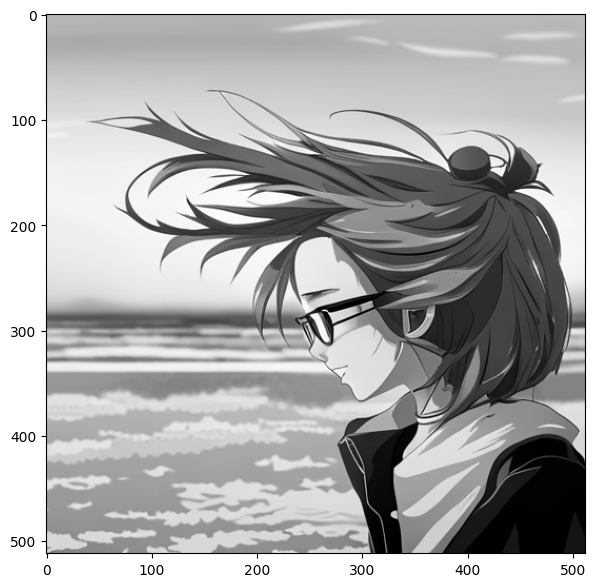

In [5]:
# Загрузка изображения
img = Image.open('img.png').convert('L')
img_array = np.array(img)

# Вывод изображения
plt.figure(figsize=(7,7))
plt.imshow(img_array, cmap='gray')
plt.show()

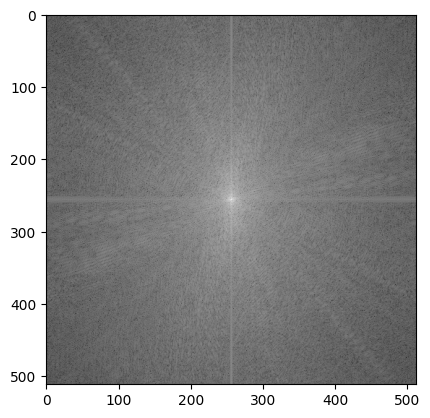

[4.16696490e+07 5.06088429e+06 5.06088429e+06 ... 2.61210062e+00
 1.66996128e+00 1.66996128e+00]


In [6]:
# Применение преобразования Фурье
fourier = fftshift(fft2(img_array))

sorted_abs_fur = np.sort(abs(fourier).reshape(-1))[::-1]

# Вывод фурье образа
plt.imshow(np.log(1 + np.abs(fourier)), cmap='gray')
plt.show()
print(sorted_abs_fur)

In [7]:
def plot_func_fur(change):
    K=sorted_abs_fur.size-1-change
    fourier_k = fourier * (np.abs(fourier) >= sorted_abs_fur[K])
    print(sorted_abs_fur.size-change)

    # Обратное преобразование Фурье
    inverse = np.abs(ifft2(ifftshift(fourier_k)))

    # Вывод изображения после обратного преобразования Фурье
    plt.figure(figsize=(7,7))
    plt.imshow(inverse, cmap='gray')
    plt.show()
    
sliderFur.value=0
sliderFur.min=0
sliderFur.max=sorted_abs_fur.size-1
sliderFur.step=1

interact(plot_func_fur, change=sliderFur);

interactive(children=(IntSlider(value=0, description='Change:', layout=Layout(width='90%'), max=262143), Outpu…

In [8]:
# Применение SVD
U, s, V = np.linalg.svd(img_array)

def plot_func(change):
    # Удаление малозначительных компонентов после SVD
    i = s.size-1-change
    K_svd = s[i]  # Пороговое значение
    s_k = s * (s >= K_svd)
    print(s.size-change+2*512*(s.size-change))

    # Восстановление изображения
    reconstructed = U @ np.diag(s_k) @ V

    # Вывод изображения после SVD
    plt.figure(figsize=(7,7))
    plt.imshow(reconstructed, cmap='gray')
    plt.show()
    
sliderSVD.min=0
sliderSVD.max=s.size-1    

interact(plot_func, change=sliderSVD);

interactive(children=(IntSlider(value=1, description='Change:', layout=Layout(width='90%'), max=511), Output()…